# Data Analysis

## Librerias

### Instalacion

In [85]:
import sys
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install folium
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install scipy

### Importacion

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import folium

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

## Funciones

### Funcion boxplot precio - campo pivote

In [87]:
def fncGenerarBoxPlot(strCampoPrecio, strCampoPivote, strTitulo1, strTitulo2):
    # Obteniendo los diferentes subsets, para venta y alquiler.
    dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', [strCampoPrecio, strCampoPivote]]
    dfTemp1[strCampoPivote] = dfTemp1[strCampoPivote].astype('category')

    dfTemp2 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', [strCampoPrecio, strCampoPivote]]
    dfTemp2[strCampoPivote] = dfTemp2[strCampoPivote].astype('category')


    # Definiendo el lienzo como subplots de 2 filas y 1 columna
    fig, ax = plt.subplots(2, 1)

    # Definiendo tamano
    fig.set_figheight(10)
    fig.set_figwidth(10)

    # Generando la primera grafica (Alquiler)
    g1 = sns.boxplot(y=strCampoPrecio, x=strCampoPivote, data=dfTemp1, ax=ax[0], palette = 'GnBu_d')
    #g1.set(xticklabels=[])
    g1.set(title=strTitulo1)
    g1.set(xlabel=None)

    # Generando la segunda grafica (Venta)
    g2 = sns.boxplot(y=strCampoPrecio, x=strCampoPivote, data=dfTemp2, ax=ax[1], palette = 'Blues')
    #g2.set(xticklabels=[])
    g2.set(title=strTitulo2)
    #g2.set(xlabel=None)

    return(plt)

### Funcion scatterplot precio - campo pivote

In [88]:
def fncGenerarScatterPlot(strCampoPrecio, strCampoPivote, strTitulo1, strTitulo2):
    # Obteniendo los subsets a evaluar
    dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', [strCampoPrecio, strCampoPivote]]
    dfTemp2 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', [strCampoPrecio, strCampoPivote]]

    # Definiendo el lienzo como subplots de 2 filas y 1 columna
    fig, ax = plt.subplots(2, 1)

    # Definiendo tamano
    fig.set_figheight(10)
    fig.set_figwidth(10)

    # Se genera la primera grafica
    g1 = sns.scatterplot(x = strCampoPivote, y = strCampoPrecio, data=dfTemp1, ax = ax[0])
    g1.set(title = strTitulo1)

    # Se genera la segunda grafica
    g2 = sns.scatterplot(x = strCampoPivote, y = strCampoPrecio, data=dfTemp2, ax = ax[1])
    g2.set(title = strTitulo2)

    return(plt)

### Funcion para construir modelo KMeans

In [89]:
def fncConstruirModeloKMeans(intKClusters, listColores, dfTemp1, factorRadio):
    
    # Se obtienen los valores que se utilizaran para la construccion de modelo KMeans
    X = np.array(list(zip(dfTemp1['longitud'], dfTemp1['latitud']))).reshape(len(dfTemp1['longitud']), 2)

    # Construccion del modelo
    kmeanModel = KMeans(n_clusters = intKClusters, max_iter = 2000).fit(X)

    # Asignacion de clusters a registros
    dfTemp1['cluster'] = kmeanModel.labels_

    # Creacion del mapa ubicado en ciudad de Guatemala
    m = folium.Map(location=[14.6407, -90.5132], zoom_start=12.3)

    # Agregando marcadores circules
    for i in range(0,len(dfTemp1['precio_real'])):
        folium.Circle(
            location=[dfTemp1.iloc[i]['latitud'], dfTemp1.iloc[i]['longitud']],
            popup=str(dfTemp1.iloc[i]['precio_real']) + '[' + str(dfTemp1.iloc[i]['cluster']) + ']'+ '\n' 
                + dfTemp1.iloc[i]['linkpagina'],
            radius=(dfTemp1.iloc[i]['precio_real']/(factorRadio * dfTemp1.iloc[i]['espacio_m2'])),
            color=listColores[dfTemp1.iloc[i]['cluster']],
            fill=True,
            fill_color=listColores[dfTemp1.iloc[i]['cluster']]).add_to(m)

    # Regresamos el objeto mapa
    return(m)

## Lectura Datos

In [90]:
dfFinalSet = pd.read_csv('FinalSet.csv', dtype = {'codigoencabezado': 'int32'})

dfFinalSet.describe(include = 'all')

codigoencabezado    idregistro  \
count        2488.000000  2.488000e+03   
unique               NaN           NaN   
top                  NaN           NaN   
freq                 NaN           NaN   
mean         1245.141479  1.095538e+09   
std           718.766531  1.472729e+07   
min             1.000000  9.637780e+08   
25%           622.750000  1.100258e+09   
50%          1245.500000  1.100371e+09   
75%          1867.250000  1.100393e+09   
max          2489.000000  1.100418e+09   

                                               linkpagina fecharegistro  \
count                                                2488          2488   
unique                                               1339             9   
top     https://www.olx.com.gt/item/venta-de-apartamen...    2020-06-10   
freq                                                   10           550   
mean                                                  NaN           NaN   
std                                                   NaN           NaN   
min                                                   NaN           NaN   
25%                                                   NaN           NaN   
50%                                                   NaN           NaN   
75%                                                   NaN           NaN   
max                                                   NaN           NaN   

        administracion amueblado    antiguedad        banos  habitaciones  \
count       515.000000      1514          1190  2487.000000   2479.000000   
unique             NaN         2             7          NaN           NaN   
top                NaN        No  Hasta 5 años          NaN           NaN   
freq               NaN      1186           371          NaN           NaN   
mean        842.456311       NaN           NaN     1.959791      2.296491   
std        4750.896978       NaN           NaN     0.891991      0.813793   
min           0.000000       NaN           NaN     0.000000      1.000000   
25%           0.000000       NaN           NaN     1.000000      2.000000   
50%           0.000000       NaN           NaN     2.000000      2.000000   
75%         675.000000       NaN           NaN     2.000000      3.000000   
max       65546.000000       NaN           NaN    10.000000     10.000000   

       estudio  ...  moneda         tipo  tipo_vendedor    favoritos  \
count     2479  ...    2488         2486           2053  2488.000000   
unique       2  ...       2            4              2          NaN   
top         No  ...     US$  Apartamento   Inmobiliaria          NaN   
freq      2470  ...    1583         2439           1722          NaN   
mean       NaN  ...     NaN          NaN            NaN     2.102492   
std        NaN  ...     NaN          NaN            NaN    13.710706   
min        NaN  ...     NaN          NaN            NaN     0.000000   
25%        NaN  ...     NaN          NaN            NaN     0.000000   
50%        NaN  ...     NaN          NaN            NaN     1.000000   
75%        NaN  ...     NaN          NaN            NaN     2.000000   
max        NaN  ...     NaN          NaN            NaN   642.000000   

                                      titulo             fecha_creacion  \
count                                   2488                       2488   
unique                                  1255                       1440   
top     ALQUILO APARTAMENTO EN VILLA CANALES  2020-05-03T13:47:49-06:00   
freq                                      13                          9   
mean                                     NaN                        NaN   
std                                      NaN                        NaN   
min                                      NaN                        NaN   
25%                                      NaN                        NaN   
50%                                      NaN                        NaN   
75%                                      NaN                  

## Data Wrangling

### Conversion Series

In [91]:
dfAnalisisSet = dfFinalSet.astype({'codigoencabezado': 'str', 
                                'idregistro': 'str',
                                'partner_code': 'str',
                                'user_id': 'str'
                               })

dfAnalisisSet['fecharegistro'] = pd.to_datetime(dfAnalisisSet['fecharegistro'], format = "%Y-%m-%d")

dfAnalisisSet.describe(include = 'all')

codigoencabezado  idregistro  \
count              2488        2488   
unique             2488        1330   
top                1666  1100382952   
freq                  1          10   
first               NaN         NaN   
last                NaN         NaN   
mean                NaN         NaN   
std                 NaN         NaN   
min                 NaN         NaN   
25%                 NaN         NaN   
50%                 NaN         NaN   
75%                 NaN         NaN   
max                 NaN         NaN   

                                               linkpagina  \
count                                                2488   
unique                                               1339   
top     https://www.olx.com.gt/item/venta-de-apartamen...   
freq                                                   10   
first                                                 NaN   
last                                                  NaN   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

              fecharegistro  administracion amueblado    antiguedad  \
count                  2488      515.000000      1514          1190   
unique                    9             NaN         2             7   
top     2020-06-10 00:00:00             NaN        No  Hasta 5 años   
freq                    550             NaN      1186           371   
first   2020-05-14 00:00:00             NaN       NaN           NaN   
last    2020-06-15 00:00:00             NaN       NaN           NaN   
mean                    NaN      842.456311       NaN           NaN   
std                     NaN     4750.896978       NaN           NaN   
min                     NaN        0.000000       NaN           NaN   
25%                     NaN        0.000000       NaN           NaN   
50%                     NaN        0.000000       NaN           NaN   
75%                     NaN      675.000000       NaN           NaN   
max                     NaN    65546.000000       NaN           NaN   

              banos  habitaciones estudio  ...  moneda         tipo  \
count   2487.000000   2479.000000    2479  ...    2488         2486   
unique          NaN           NaN       2  ...       2            4   
top             NaN           NaN      No  ...     US$  Apartamento   
freq            NaN           NaN    2470  ...    1583         2439   
first           NaN           NaN     NaN  ...     NaN          NaN   
last            NaN           NaN     NaN  ...     NaN          NaN   
mean       1.959791      2.296491     NaN  ...     NaN          NaN   
std        0.891991      0.813793     NaN  ...     NaN          NaN   
min        0.000000      1.000000     NaN  ...     NaN          NaN   
25%        1.000000      2.000000     NaN  ...     NaN          NaN   
50%        2.000000      2.000000     NaN  ...     NaN          NaN   
75%        2.000000      3.000000     NaN  ...     NaN          NaN   
max       10.000000     10.000000     NaN  ...     NaN          NaN   

        tipo_vendedor    favoritos                                titulo  \
count            2053  2488.000000                                  2488   
unique              2          NaN                                  1255   
top      Inmobiliaria          NaN  ALQUILO APARTAMENTO EN VILLA CANALES   
freq             1722          NaN                                    13   
first             NaN          NaN                                   NaN   
last              NaN          NaN                                   NaN   
mean              NaN     2.102492                                   NaN   
std    

### Registros Unicos
Se obtendran solo los ultimos registros obtenidos para cada id de registro (idregistro) utilizando el campo fecharegistro.

In [92]:
dfAnalisisSet = dfAnalisisSet.loc[dfAnalisisSet.reset_index().groupby(['idregistro'])['fecharegistro'].idxmax()]

dfAnalisisSet.head(10)

codigoencabezado  idregistro  \
1630             1632  1007688385   
974               976  1014321966   
975               977  1014324725   
965               967  1015576872   
556               557  1023789298   
557               558  1023944274   
559               560  1029720345   
2219             2221  1030164820   
578               579  1030987380   
323               324  1033662607   

                                             linkpagina fecharegistro  \
1630  https://www.olx.com.gt/item/venta-apartamento-...    2020-06-10   
974   https://www.olx.com.gt/item/apartamentos-y-ofi...    2020-05-30   
975   https://www.olx.com.gt/item/apartamentos-nuevo...    2020-05-30   
965   https://www.olx.com.gt/item/amplio-apartamento...    2020-05-30   
556   https://www.olx.com.gt/item/alquilo-apartament...    2020-05-25   
557   https://www.olx.com.gt/item/vendo-apartamento-...    2020-05-25   
559   https://www.olx.com.gt/item/vendo-apartamento-...    2020-05-25   
2219  https://www.olx.com.gt/item/vendo-apartamento-...    2020-06-15   
578   https://www.olx.com.gt/item/alquilo-renta-apar...    2020-05-25   
323   https://www.olx.com.gt/item/se-alquila-apartam...    2020-05-20   

      administracion amueblado         antiguedad  banos  habitaciones  \
1630             NaN       NaN  Entre 5 y 10 años    3.0           3.0   
974              NaN       NaN    En construcción    2.0           1.0   
975              NaN       NaN         A estrenar    2.0           2.0   
965              NaN        No  Entre 5 y 10 años    2.0           2.0   
556              NaN        No                NaN    2.0           3.0   
557              NaN       NaN                NaN    2.0           2.0   
559              NaN       NaN                NaN    2.0           3.0   
2219             NaN       NaN                NaN    2.0           2.0   
578              NaN        No                NaN    1.0           2.0   
323              NaN        No                NaN    3.0           3.0   

     estudio  ...  moneda         tipo  tipo_vendedor favoritos  \
1630      No  ...     US$  Apartamento   Inmobiliaria         6   
974       No  ...     US$  Apartamento   Inmobiliaria         1   
975       No  ...     US$  Apartamento   Inmobiliaria        28   
965       No  ...       Q  Apartamento   Inmobiliaria        13   
556       No  ...     US$  Apartamento   Inmobiliaria         1   
557       No  ...     US$  Apartamento   Inmobiliaria         0   
559       No  ...     US$  Apartamento   Inmobiliaria         4   
2219      No  ...     US$  Apartamento   Inmobiliaria         0   
578       No  ...     US$  Apartamento   Inmobiliaria         1   
323       No  ...     US$  Apartamento   Inmobiliaria         1   

                                                 titulo  \
1630                          VENTA APARTAMENTO ZONA 10   
974   Apartamentos y Oficinas en Diagonal 6 zona 10,...   
975   Apartamentos NUEVOS 2 y 3 dormitorios Vista He...   
965   Amplio Apartamento alquilado en Jardines de La...   
556   ALQUILO APARTAMENTO EN ZONA 16undefined#x2F;ACODI   
557   VENDO APARTAMENTO EN AIRALI, ZONA 10 OPCIÓN 2u...   
559   VENDO APARTAMENTO EN ACANTOS DE CAYALA, ZONA 1...   
2219       VENDO APARTAMENTO EN AIRALI, ZONA 10 / ACODI   
578   ALQUILO RENTA APARTAMENTO EN TIEPOLO KM. 18 CA...   
323   Se alquila Apartamento en zona 16 en el sector...   

                 fecha_creacion               valido_hasta  \
1630  2020-06-07T15:50:39-06:00  2020-09-05T15:50:39-06:00   
974   2020-05-27T16:38:13-06:00  2020-08-25T16:38:13-06:00   
975   2020-05-27T16:34:58-06:00  2020-08-25T16:34:58-06:00   
965   2020-05-27T17:25:02-06:00  2020-08-25T17:25:02-06:00   
556   2020-05-23T14:54:00-06:00  2020-08-21T14:54:00-06:00   
557   2020-05-23T14:49:40-06:00  2020-08-21T14:49:40-06:00   
559   2020-05-23T14:20:53-06:00  2020-08-21T14:20:53-06:00   
2219  2020-06-11T14:35:58-06:00  2020-09-09T14:35:58-06:00   
578   2020-05-22T19:20:27-06:00 

### Cambio Moneda Precio

In [93]:
cambio_moneda = 7.69
dfAnalisisSet['precio_real'] = np.where(dfAnalisisSet['moneda'] == 'US$', dfAnalisisSet['precio'] * cambio_moneda, 
                                        dfAnalisisSet['precio'])

dfAnalisisSet.head(10)

codigoencabezado  idregistro  \
1630             1632  1007688385   
974               976  1014321966   
975               977  1014324725   
965               967  1015576872   
556               557  1023789298   
557               558  1023944274   
559               560  1029720345   
2219             2221  1030164820   
578               579  1030987380   
323               324  1033662607   

                                             linkpagina fecharegistro  \
1630  https://www.olx.com.gt/item/venta-apartamento-...    2020-06-10   
974   https://www.olx.com.gt/item/apartamentos-y-ofi...    2020-05-30   
975   https://www.olx.com.gt/item/apartamentos-nuevo...    2020-05-30   
965   https://www.olx.com.gt/item/amplio-apartamento...    2020-05-30   
556   https://www.olx.com.gt/item/alquilo-apartament...    2020-05-25   
557   https://www.olx.com.gt/item/vendo-apartamento-...    2020-05-25   
559   https://www.olx.com.gt/item/vendo-apartamento-...    2020-05-25   
2219  https://www.olx.com.gt/item/vendo-apartamento-...    2020-06-15   
578   https://www.olx.com.gt/item/alquilo-renta-apar...    2020-05-25   
323   https://www.olx.com.gt/item/se-alquila-apartam...    2020-05-20   

      administracion amueblado         antiguedad  banos  habitaciones  \
1630             NaN       NaN  Entre 5 y 10 años    3.0           3.0   
974              NaN       NaN    En construcción    2.0           1.0   
975              NaN       NaN         A estrenar    2.0           2.0   
965              NaN        No  Entre 5 y 10 años    2.0           2.0   
556              NaN        No                NaN    2.0           3.0   
557              NaN       NaN                NaN    2.0           2.0   
559              NaN       NaN                NaN    2.0           3.0   
2219             NaN       NaN                NaN    2.0           2.0   
578              NaN        No                NaN    1.0           2.0   
323              NaN        No                NaN    3.0           3.0   

     estudio  ...         tipo  tipo_vendedor  favoritos  \
1630      No  ...  Apartamento   Inmobiliaria          6   
974       No  ...  Apartamento   Inmobiliaria          1   
975       No  ...  Apartamento   Inmobiliaria         28   
965       No  ...  Apartamento   Inmobiliaria         13   
556       No  ...  Apartamento   Inmobiliaria          1   
557       No  ...  Apartamento   Inmobiliaria          0   
559       No  ...  Apartamento   Inmobiliaria          4   
2219      No  ...  Apartamento   Inmobiliaria          0   
578       No  ...  Apartamento   Inmobiliaria          1   
323       No  ...  Apartamento   Inmobiliaria          1   

                                                 titulo  \
1630                          VENTA APARTAMENTO ZONA 10   
974   Apartamentos y Oficinas en Diagonal 6 zona 10,...   
975   Apartamentos NUEVOS 2 y 3 dormitorios Vista He...   
965   Amplio Apartamento alquilado en Jardines de La...   
556   ALQUILO APARTAMENTO EN ZONA 16undefined#x2F;ACODI   
557   VENDO APARTAMENTO EN AIRALI, ZONA 10 OPCIÓN 2u...   
559   VENDO APARTAMENTO EN ACANTOS DE CAYALA, ZONA 1...   
2219       VENDO APARTAMENTO EN AIRALI, ZONA 10 / ACODI   
578   ALQUILO RENTA APARTAMENTO EN TIEPOLO KM. 18 CA...   
323   Se alquila Apartamento en zona 16 en el sector...   

                 fecha_creacion               valido_hasta  \
1630  2020-06-07T15:50:39-06:00  2020-09-05T15:50:39-06:00   
974   2020-05-27T16:38:13-06:00  2020-08-25T16:38:13-06:00   
975   2020-05-27T16:34:58-06:00  2020-08-25T16:34:58-06:00   
965   2020-05-27T17:25:02-06:00  2020-08-25T17:25:02-06:00   
556   2020-05-23T14:54:00-06:00  2020-08-21T14:54:00-06:00   
557   2020-05-23T14:49:40-06:00  2020-08-21T14:49:40-06:00   
559   2020-05-23T14:20:53-06:00  2020-08-21T14:20:53-06:00   
2219  2020-06-11T14:35:58-06:00  2020-09-09T14:35:58-06:00   
578   2020-05-22T19:20:27-06:00  2020-08-20T19:20:27-06:00   
323   2020-04-29T14:13:30-06:00  2020-07-28T14:

### Columna Oferta
Se creara una columna que determine si la oferta es de alquiler o venta. Se utilizara el campo 

In [94]:
dfAnalisisSet['oferta'] = ['Venta' if precio > 50000 else 'Alquiler' for precio in dfAnalisisSet['precio_real']]

dfAnalisisSet.groupby(['oferta']).count()['codigoencabezado']

oferta
Alquiler    833
Venta       497
Name: codigoencabezado, dtype: int64

## Data Visualization

### Precio por apartamento amueblado

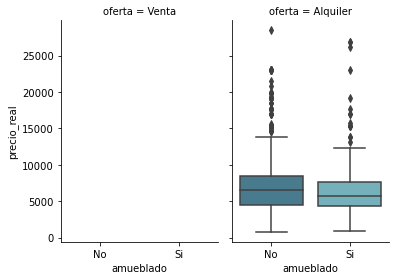

In [95]:
sns.catplot(x = 'amueblado', y = 'precio_real', 
            col = 'oferta', 
            kind = 'box', 
            data = dfAnalisisSet,
            palette = 'GnBu_d',
            height=4, 
            aspect=.7)

### Precio por antiguedad

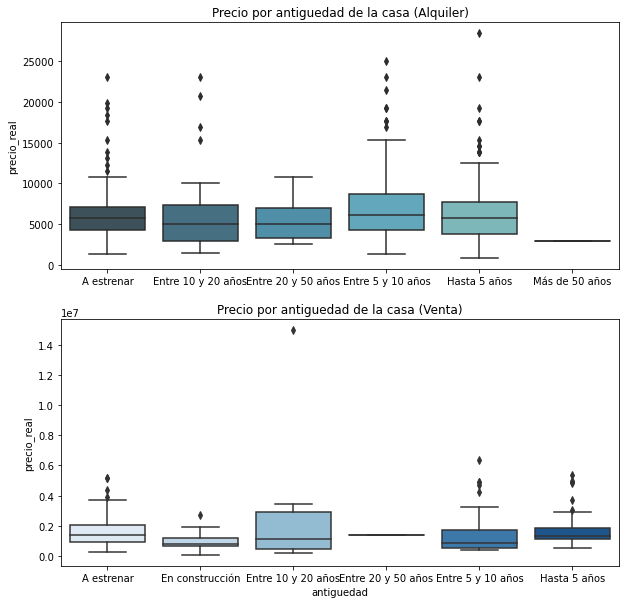

In [96]:
plt = fncGenerarBoxPlot('precio_real', 'antiguedad', 
                        'Precio por antiguedad de la casa (Alquiler)', 
                        'Precio por antiguedad de la casa (Venta)')
plt.show()


### Precio por moneda

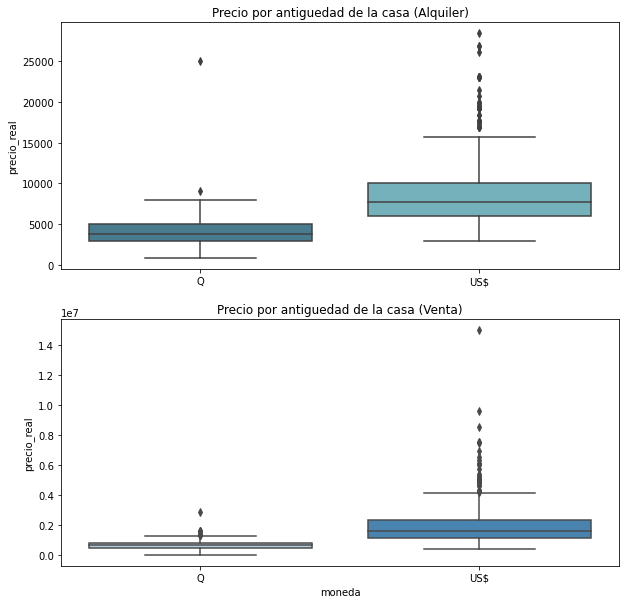

In [97]:
plt = fncGenerarBoxPlot('precio_real', 'moneda', 
                        'Precio por antiguedad de la casa (Alquiler)', 
                        'Precio por antiguedad de la casa (Venta)')
plt.show()

### Precio por banos

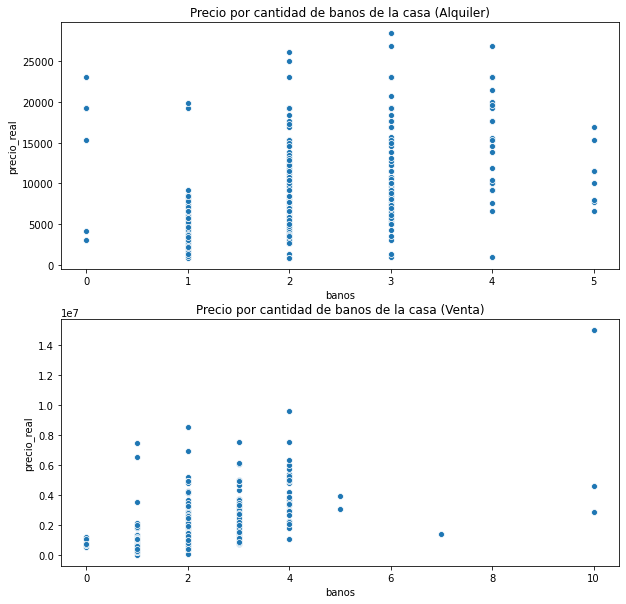

In [98]:
plt = fncGenerarScatterPlot('precio_real', 'banos', 
                            'Precio por cantidad de banos de la casa (Alquiler)',
                            'Precio por cantidad de banos de la casa (Venta)')

plt.show()

### Precio por habitaciones

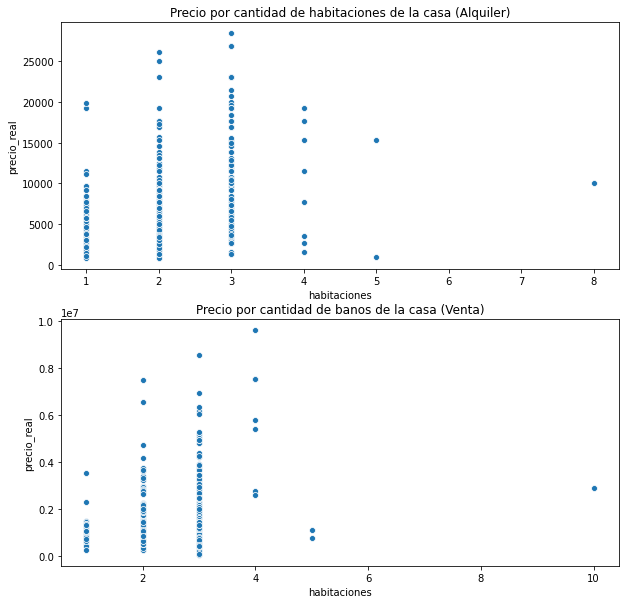

In [99]:
plt = fncGenerarScatterPlot('precio_real', 'habitaciones', 
                            'Precio por cantidad de habitaciones de la casa (Alquiler)',
                            'Precio por cantidad de banos de la casa (Venta)')

plt.show()

### Precio por espacio (m2)

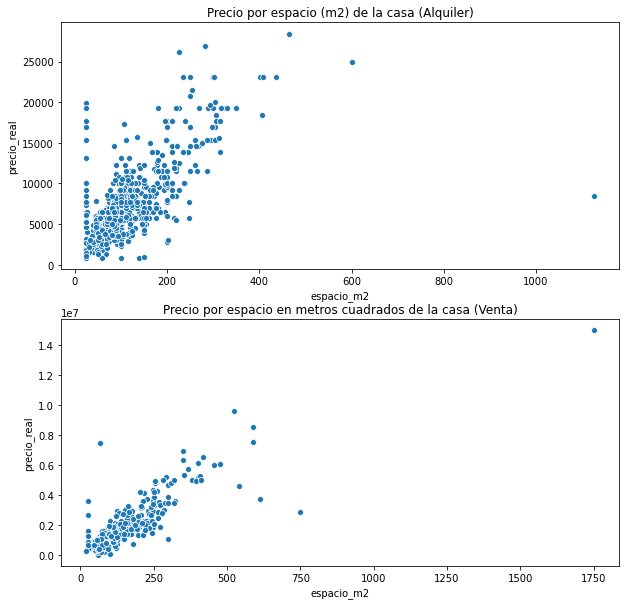

In [100]:
plt = fncGenerarScatterPlot('precio_real', 'espacio_m2', 
                            'Precio por espacio (m2) de la casa (Alquiler)',
                            'Precio por espacio en metros cuadrados de la casa (Venta)')

plt.show()

In [101]:
dfTemp = dfAnalisisSet.loc[(dfAnalisisSet['oferta'] == 'Venta') & (dfAnalisisSet['precio_real'] < 5000000) &
                          (dfAnalisisSet['espacio_m2'] > 500), ['codigoencabezado', 'espacio_m2', 'precio_real']]

dfTemp.head()

codigoencabezado  espacio_m2  precio_real
1898             1900       611.0    3729650.0
2198             2200       540.0    4614000.0
2160             2162       750.0    2900000.0

### Precio y ubicacion

In [102]:
# Creacion del mapa ubicado en ciudad de Guatemala
m = folium.Map(location=[14.6407, -90.5132], zoom_start=12.3)

# Obteniendo los subsets a evaluar
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

# Agregando marcadores circules
for i in range(0,len(dfTemp1['precio_real'])):
    folium.Circle(
        location=[dfTemp1.iloc[i]['latitud'], dfTemp1.iloc[i]['longitud']],
        popup=str(dfTemp1.iloc[i]['precio_real']) + dfTemp1.iloc[i]['linkpagina'],
        radius=(dfTemp1.iloc[i]['precio_real']/dfTemp1.iloc[i]['espacio_m2'])/ 5,
        color='blue',
        fill=True,
        fill_color='blue').add_to(m)


m

In [103]:
# Creacion del mapa ubicado en ciudad de Guatemala
m = folium.Map(location=[14.6407, -90.5132], zoom_start=12.3)

# Obteniendo los subsets a evaluar
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

# Agregando marcadores circules
for i in range(0,len(dfTemp1['precio_real'])):
    folium.Circle(
        location=[dfTemp1.iloc[i]['latitud'], dfTemp1.iloc[i]['longitud']],
        popup=str(dfTemp1.iloc[i]['precio_real']) + dfTemp1.iloc[i]['linkpagina'],
        radius=(dfTemp1.iloc[i]['precio_real']/dfTemp1.iloc[i]['espacio_m2'])/ 500,
        color='blue',
        fill=True,
        fill_color='blue').add_to(m)


m

### Precio por parqueo (tiene o no)

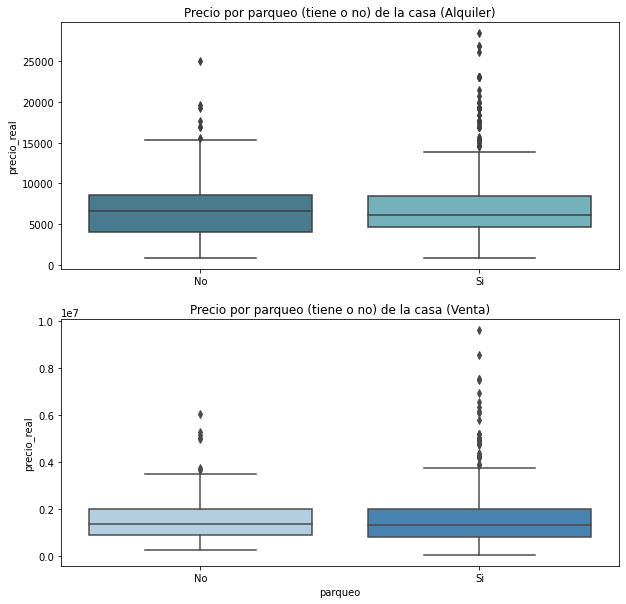

In [104]:
plt = fncGenerarBoxPlot('precio_real', 'parqueo', 
                        'Precio por parqueo (tiene o no) de la casa (Alquiler)', 
                        'Precio por parqueo (tiene o no) de la casa (Venta)')
plt.show()

### Precio por tipo(casa o apartamento)

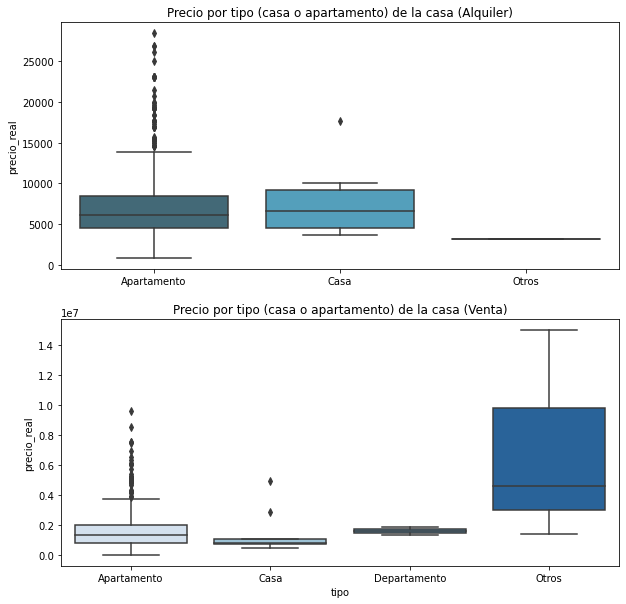

In [105]:
plt = fncGenerarBoxPlot('precio_real', 'tipo', 
                        'Precio por tipo (casa o apartamento) de la casa (Alquiler)', 
                        'Precio por tipo (casa o apartamento) de la casa (Venta)')
plt.show()

### Precio por tipo de vendedor

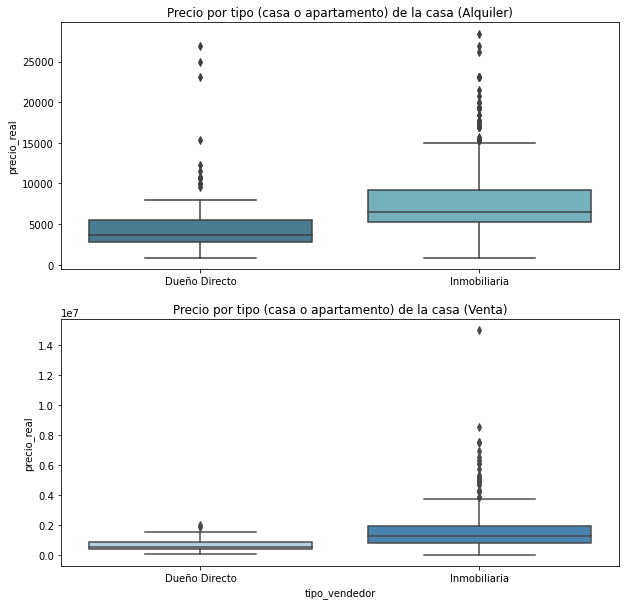

In [106]:
plt = fncGenerarBoxPlot('precio_real', 'tipo_vendedor', 
                        'Precio por tipo (casa o apartamento) de la casa (Alquiler)', 
                        'Precio por tipo (casa o apartamento) de la casa (Venta)')
plt.show()

### Precio por favoritos

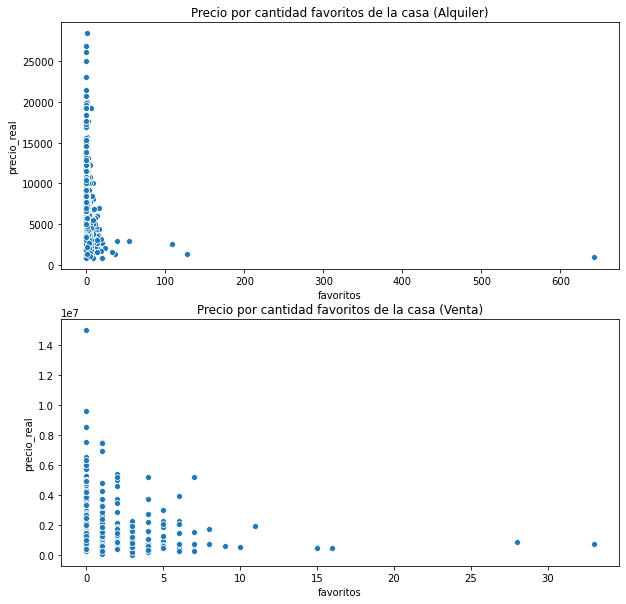

In [107]:
plt = fncGenerarScatterPlot('precio_real', 'favoritos', 
                            'Precio por cantidad favoritos de la casa (Alquiler)',
                            'Precio por cantidad favoritos de la casa (Venta)')

plt.show()

### Elbow - KMeans (Venta)

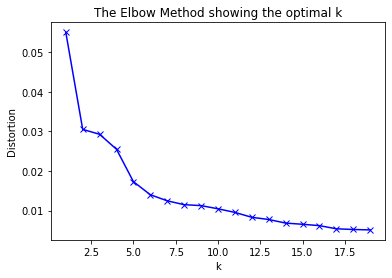

In [108]:
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

X = np.array(list(zip(dfTemp1['longitud'], dfTemp1['latitud']))).reshape(len(dfTemp1['longitud']), 2)

# Determinacion de valor K
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Precio Ubicacion Clusterizados (Venta)

In [109]:
# Seleccion de la cantidad de clusters
kClusters = 10

# Colores a utilizar
listaColores = [
    '#d50102',
    '#a6b401',
    '#e55b7e',
    '#00243f',
    '#216a61',
    '#005236',
    '#b94d5c',
    '#dc3080',
    'lightgray',
    'black'
]

# Filtrar dataframe a utilizar para analisis
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

# Construccion del mapa utilizando k-means
m = fncConstruirModeloKMeans(kClusters, listaColores, dfTemp1, 500)

# Mostrar mapa
m

### Precio Ubicacion Clusterizados (Alquiler)

In [110]:
# Seleccion de la cantidad de clusters
kClusters = 10

# Colores a utilizar
listaColores = [
    '#d50102',
    '#a6b401',
    '#e55b7e',
    '#00243f',
    '#216a61',
    '#005236',
    '#b94d5c',
    '#dc3080',
    'lightgray',
    'black'
]

# Filtrar dataframe a utilizar para analisis
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

# Construccion del mapa utilizando k-means
m = fncConstruirModeloKMeans(kClusters, listaColores, dfTemp1, 5)

# Mostrar mapa
m